In [5]:
import nbsetup
from models.load import load_sparc
from models.sparc.result import Result

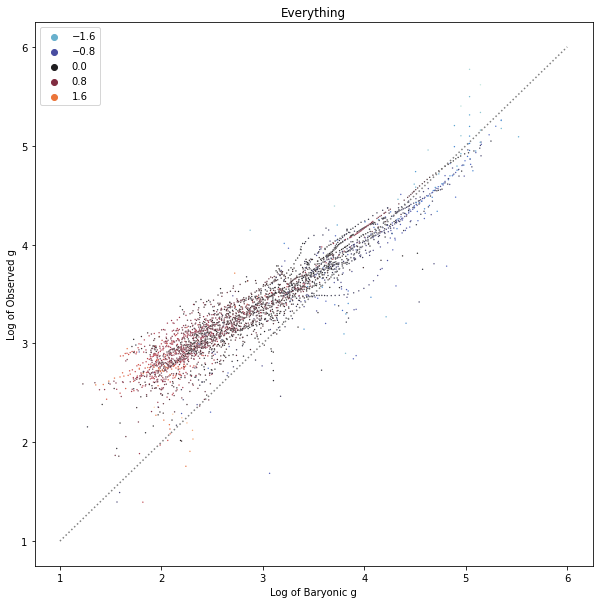

In [6]:
standard = Result(load_sparc(namespace='sparc_standard'))
g = standard.plot_rar()

In [9]:
scalar = Result(load_sparc(namespace='sparc_scalar'))

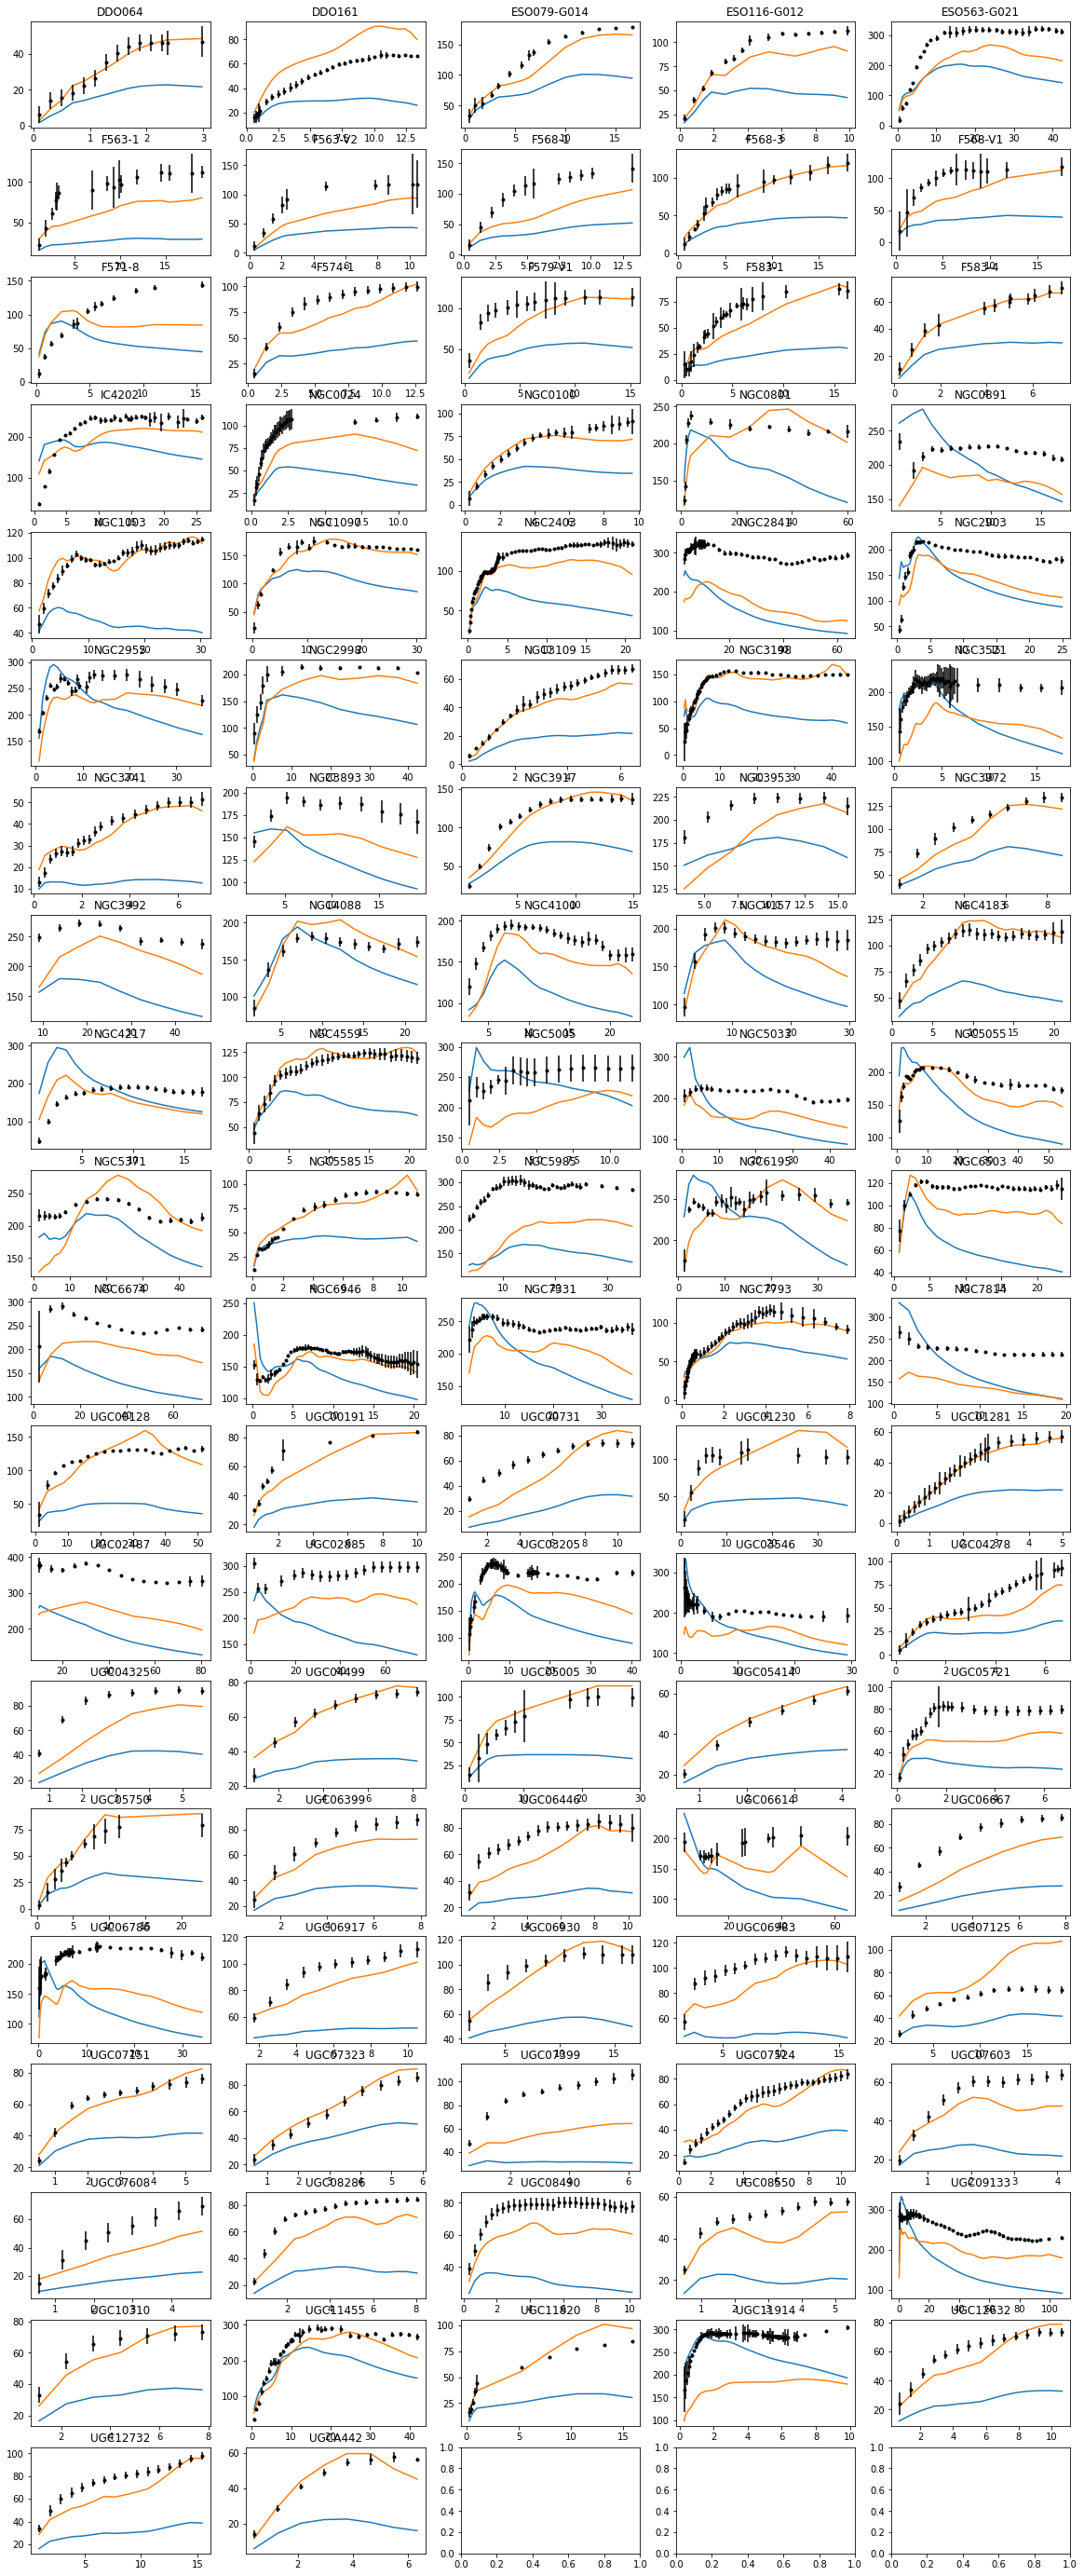

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_velocities(smog, reference, cols=5):    
    groups = smog.dataframe.query('Q == 1').groupby('Galaxy')
    fig, axes = plt.subplots((len(groups)//cols)+1, cols, figsize=(20,50))
    
    i = 0
    for galaxy, df in groups:
        ax = axes[i//cols][i%cols]
        # baryonic
        sdf = reference.dataframe.query('Galaxy=="%s"' % galaxy)
        g = sns.lineplot(x=sdf['R'], y=sdf['Sbar'], ax=ax)
        # smog
        g = sns.lineplot(x=df['R'], y=df['Sbar'], ax=ax)
        # observations
        g.errorbar(df['R'], df['Vobs'], yerr=df['e_Vobs'], fmt='.k')
        # labels
        g.set(title=galaxy, xlabel=None, ylabel=None)
        i += 1

plot_velocities(scalar, standard)